<a href="https://colab.research.google.com/github/Nachi2006/MLREPO/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pankrzysiu/cifar10-python")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/pankrzysiu/cifar10-python/versions/1


Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Displaying sample images...


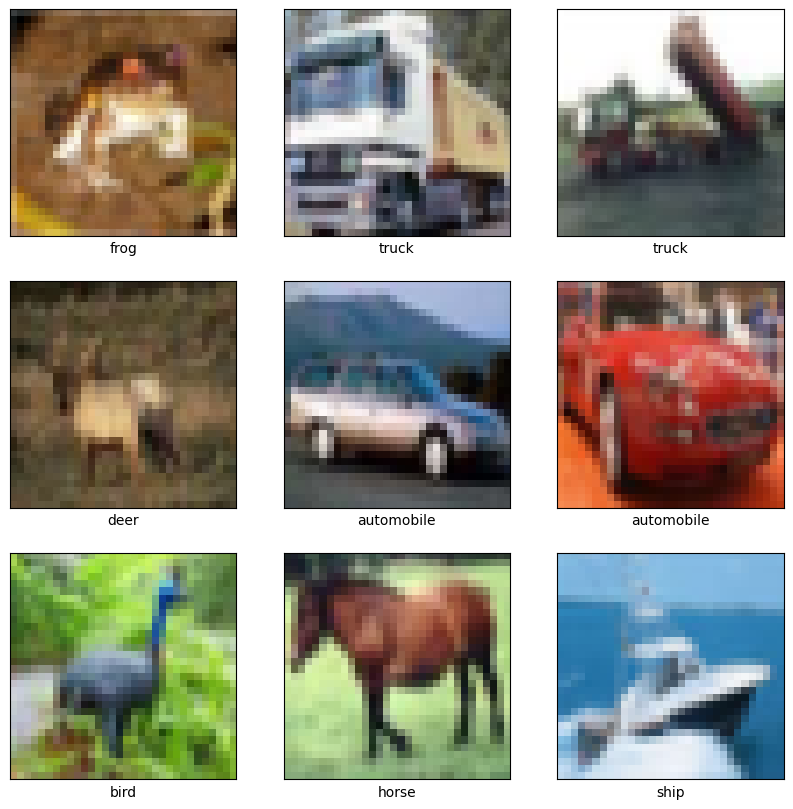

Creating and compiling model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.3556 - loss: 1.7359 - val_accuracy: 0.6123 - val_loss: 1.0904
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5992 - loss: 1.1268 - val_accuracy: 0.6816 - val_loss: 0.8986
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6677 - loss: 0.9471 - val_accuracy: 0.7237 - val_loss: 0.7934
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7021 - loss: 0.8457 - val_accuracy: 0.7384 - val_loss: 0.7448
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7238 - loss: 0.7904 - val_accuracy: 0.7380 - val_loss: 0.7496
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7397 - loss: 0.7404 - val_accuracy: 0.7550 - val_loss: 0.7084
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7584 - loss: 0.6959 - val_accuracy: 0.7338 - val_loss: 0.7723
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7

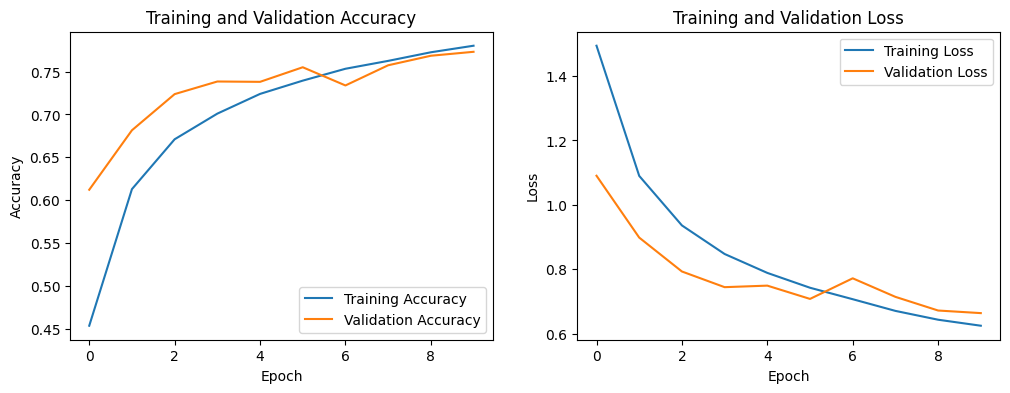

313/313 - 1s - 2ms/step - accuracy: 0.7730 - loss: 0.6643



Test accuracy: 0.7730
Model saved successfully!


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

# Constants
BATCH_SIZE = 32
EPOCHS = 10

# Class names for CIFAR-10
CLASS_NAMES = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def load_and_prepare_data():
    # Load CIFAR-10 dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

    # Normalize pixel values
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    # Convert class vectors to binary class matrices
    y_train = tf.keras.utils.to_categorical(y_train, len(CLASS_NAMES))
    y_test = tf.keras.utils.to_categorical(y_test, len(CLASS_NAMES))

    return (x_train, y_train), (x_test, y_test)

def create_model():
    model = Sequential([
        # First Convolutional Block
        Conv2D(32, 3, padding='same', activation='relu', input_shape=(32, 32, 3)),
        Conv2D(32, 3, activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Second Convolutional Block
        Conv2D(64, 3, padding='same', activation='relu'),
        Conv2D(64, 3, activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        # Flatten and Dense Layers
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(len(CLASS_NAMES), activation='softmax')
    ])

    return model

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(EPOCHS)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def display_sample_images(x_train, y_train):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train[i])
        plt.xlabel(CLASS_NAMES[np.argmax(y_train[i])])
    plt.show()

def main():
    print("Loading CIFAR-10 dataset...")
    (x_train, y_train), (x_test, y_test) = load_and_prepare_data()

    print("Displaying sample images...")
    display_sample_images(x_train, y_train)

    print("Creating and compiling model...")
    model = create_model()
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print("Training model...")
    history = model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=(x_test, y_test)
    )

    # Plot training results
    plot_training_history(history)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f"\nTest accuracy: {test_acc:.4f}")

    # Save the model
    model.save('cifar10_classifier_model.h5')
    print("Model saved successfully!")

if __name__ == '__main__':
    main()
